## Part 1: Understanding Regularization

Q1. What is regularization in the context of deep learning? Why is it important?

Regularization:
- Regularization refers to techniques used to reduce the complexity of a deep learning model to prevent overfitting. Overfitting occurs when a model performs well on training data but poorly on unseen data (test/validation data).

Importance:
- Prevent Overfitting: Ensures the model generalizes well to new data.
- Improves Generalization: Helps the model perform better on unseen data by avoiding overly complex models that memorize the training data.
- Stabilizes Training: Provides more stable and robust training by adding constraints to the model.

Q2. Explain the bias-variance tradeoff and how regularization helps in addressing this tradeoff.

Bias-Variance Tradeoff:
- Bias: Error due to overly simplistic models that fail to capture the underlying data patterns (underfitting).
- Variance: Error due to overly complex models that capture noise in the training data (overfitting).
The tradeoff involves finding a balance where the model is neither too simple (high bias) nor too complex (high variance).

Regularization:
- Reduces Variance: By penalizing complexity, regularization methods reduce the variance, helping prevent overfitting.
- Increases Bias Slightly: While regularization slightly increases bias, it typically leads to better overall model performance by achieving a better bias-variance tradeoff.

Q3. Describe the concept of L1 and L2 regularization. How do they differ in terms of penalty calculation and their effects on the model?

L1 Regularization (Lasso):
- Penalty Calculation: Adds the absolute value of coefficients to the loss function.

- Effect: Encourages sparsity, resulting in many weights being zero, effectively performing feature selection.

L2 Regularization (Ridge):
- Penalty Calculation: Adds the squared value of coefficients to the loss function.
- Effect: Encourages small weights, leading to smoother and more stable models.

Differences:
- L1: More effective for sparse models and feature selection.
- L2: More effective for reducing large weights and stabilizing the model without necessarily leading to sparsity.

Q4. Discuss the role of regularization in preventing overfitting and improving the generalization of deep learning models.

Role of Regularization:
- Penalizing Complexity: Adds a penalty term to the loss function based on the model's complexity (e.g., weights magnitude), discouraging overly complex models.
- Improving Generalization: By reducing model complexity, regularization helps the model generalize better to unseen data, thus improving performance on test/validation datasets.
- Smoothing Predictions: Regularization techniques like L2 lead to smoother predictions by reducing the impact of individual data points.

Part 2: Regularization Techniques

Q5. Explain Dropout regularization and how it works to reduce overfitting. Discuss the impact of Dropout on model training and inference.

Dropout Regularization:
- Concept: Randomly drops (sets to zero) a fraction of neurons during training, forcing the network to learn redundant representations and preventing co-adaptation of neurons.
- Impact on Training: Introduces noise in the learning process, making the model more robust by preventing reliance on specific neurons.
- Impact on Inference: During inference, dropout is not applied; instead, the weights are scaled by the dropout rate to account for the removed neurons during training.

Benefits:
- Reduces overfitting by preventing neurons from co-adapting.
- Improves generalization by creating an ensemble of smaller networks.

Drawbacks:
- Increases training time as the model needs to learn with varying subsets of neurons.
- Requires careful tuning of the dropout rate.

Q6. Describe the concept of Early Stopping as a form of regularization. How does it help prevent overfitting during the training process?

Early Stopping:
- Concept: Monitors the model’s performance on validation data and stops training when performance no longer improves, preventing the model from overfitting to the training data.
- Working:
 - Split data into training and validation sets.
 - Train the model and monitor the validation performance (e.g., validation loss).
 - Stop training if validation performance doesn’t improve after a specified number of epochs (patience).

Benefits:
- Prevents overfitting by stopping training at the optimal point.
- Saves computational resources by avoiding unnecessary training.

Drawbacks:
- Requires a validation set, reducing the amount of data available for training.
- Needs careful setting of patience and monitoring criteria.

Q7. Explain the concept of Batch Normalization and its role as a form of regularization. How does Batch Normalization help in preventing overfitting?

Batch Normalization:
- Concept: Normalizes the input of each layer to have zero mean and unit variance during training, reducing internal covariate shift.
- Role:
 - Normalizes activations of each layer, stabilizing and speeding up training.
 - Acts as a form of regularization by introducing noise due to batch statistics, which helps prevent overfitting.

Benefits:
- Stabilizes learning by maintaining consistent distribution of activations.
- Allows for higher learning rates, accelerating training.
- Reduces the need for other forms of regularization.

Drawbacks:
- Adds computational overhead due to additional normalization operations.
- May require careful tuning of the momentum and epsilon parameters.

## Part 3: Applying Regularization

Q8. Implement Dropout regularization in a deep learning model using a framework of your choice. Evaluate its impact on model performance and compare it with a model without Dropout.

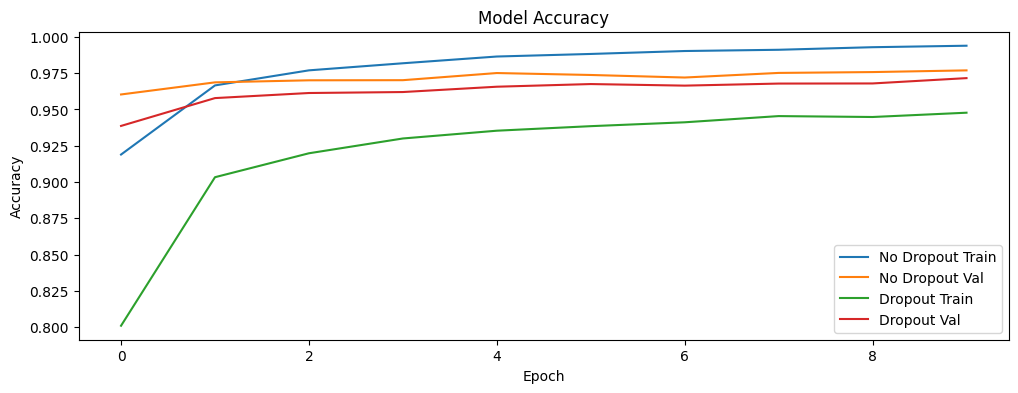

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a simple neural network model without Dropout
def create_model(dropout_rate=None):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    if dropout_rate:
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    if dropout_rate:
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    return model

# Compile and train the model with and without Dropout
dropout_rate = 0.5
models = {'No Dropout': create_model(), 'Dropout': create_model(dropout_rate)}
histories = {}

for name, model in models.items():
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0)
    histories[name] = history

# Plot the training histories
plt.figure(figsize=(12, 4))
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} Train')
    plt.plot(history.history['val_accuracy'], label=f'{name} Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Q9. Discuss the considerations and tradeoffs when choosing the appropriate regularization technique for a given deep learning task.

Considerations and Tradeoffs:

1. Task and Dataset:

- Dropout: Effective for large, complex models and datasets with high variance.
- L1/L2: Useful for linear models or when feature selection is important.
- Batch Normalization: Beneficial for deep networks with many layers.

2. Model Complexity:
- Simple Models: May require minimal regularization (e.g., L2).
- Complex Models: Often benefit from more aggressive regularization (e.g., Dropout, Batch Normalization).

3. Training Time:
- Dropout: Increases training time due to randomness.
- Batch Normalization: Adds computational overhead but can accelerate convergence with higher learning rates.

4. Hyperparameter Tuning:
- Dropout: Requires tuning the dropout rate.
- L1/L2: Requires tuning the regularization strength (lambda).
- Batch Normalization: Requires setting momentum and epsilon.

5. Performance Goals:
- Overfitting Prevention: Dropout and Batch Normalization are effective in preventing overfitting.
- Feature Selection: L1 regularization is useful for feature selection.
- Training Stability: Batch Normalization stabilizes training and can improve convergence speed.